In [1]:
from tropycal import realtime

In [2]:
realtime_obj = realtime.Realtime(jtwc=True, jtwc_source='ucar')

--> Starting to read in current storm data
--> Completed reading in current storm data (96.38 seconds)


In [3]:
active_storms = realtime_obj.list_active_storms()
active_storms

['AL132023', 'AL962023', 'EP112023', 'WP122023']

Possible issue encountered when converting Shape #0 to GeoJSON: Shapefile format requires that polygons contain at least one exterior ring, but the Shape was entirely made up of interior holes (defined by counter-clockwise orientation in the shapefile format). The rings were still included but were encoded as GeoJSON exterior rings instead of holes.
Possible issue encountered when converting Shape #0 to GeoJSON: Shapefile format requires that polygons contain at least one exterior ring, but the Shape was entirely made up of interior holes (defined by counter-clockwise orientation in the shapefile format). The rings were still included but were encoded as GeoJSON exterior rings instead of holes.


<GeoAxes: title={'left': 'Summary & NHC 7-Day Formation Outlook', 'right': 'Valid: 01 UTC 07 Sep 2023'}>

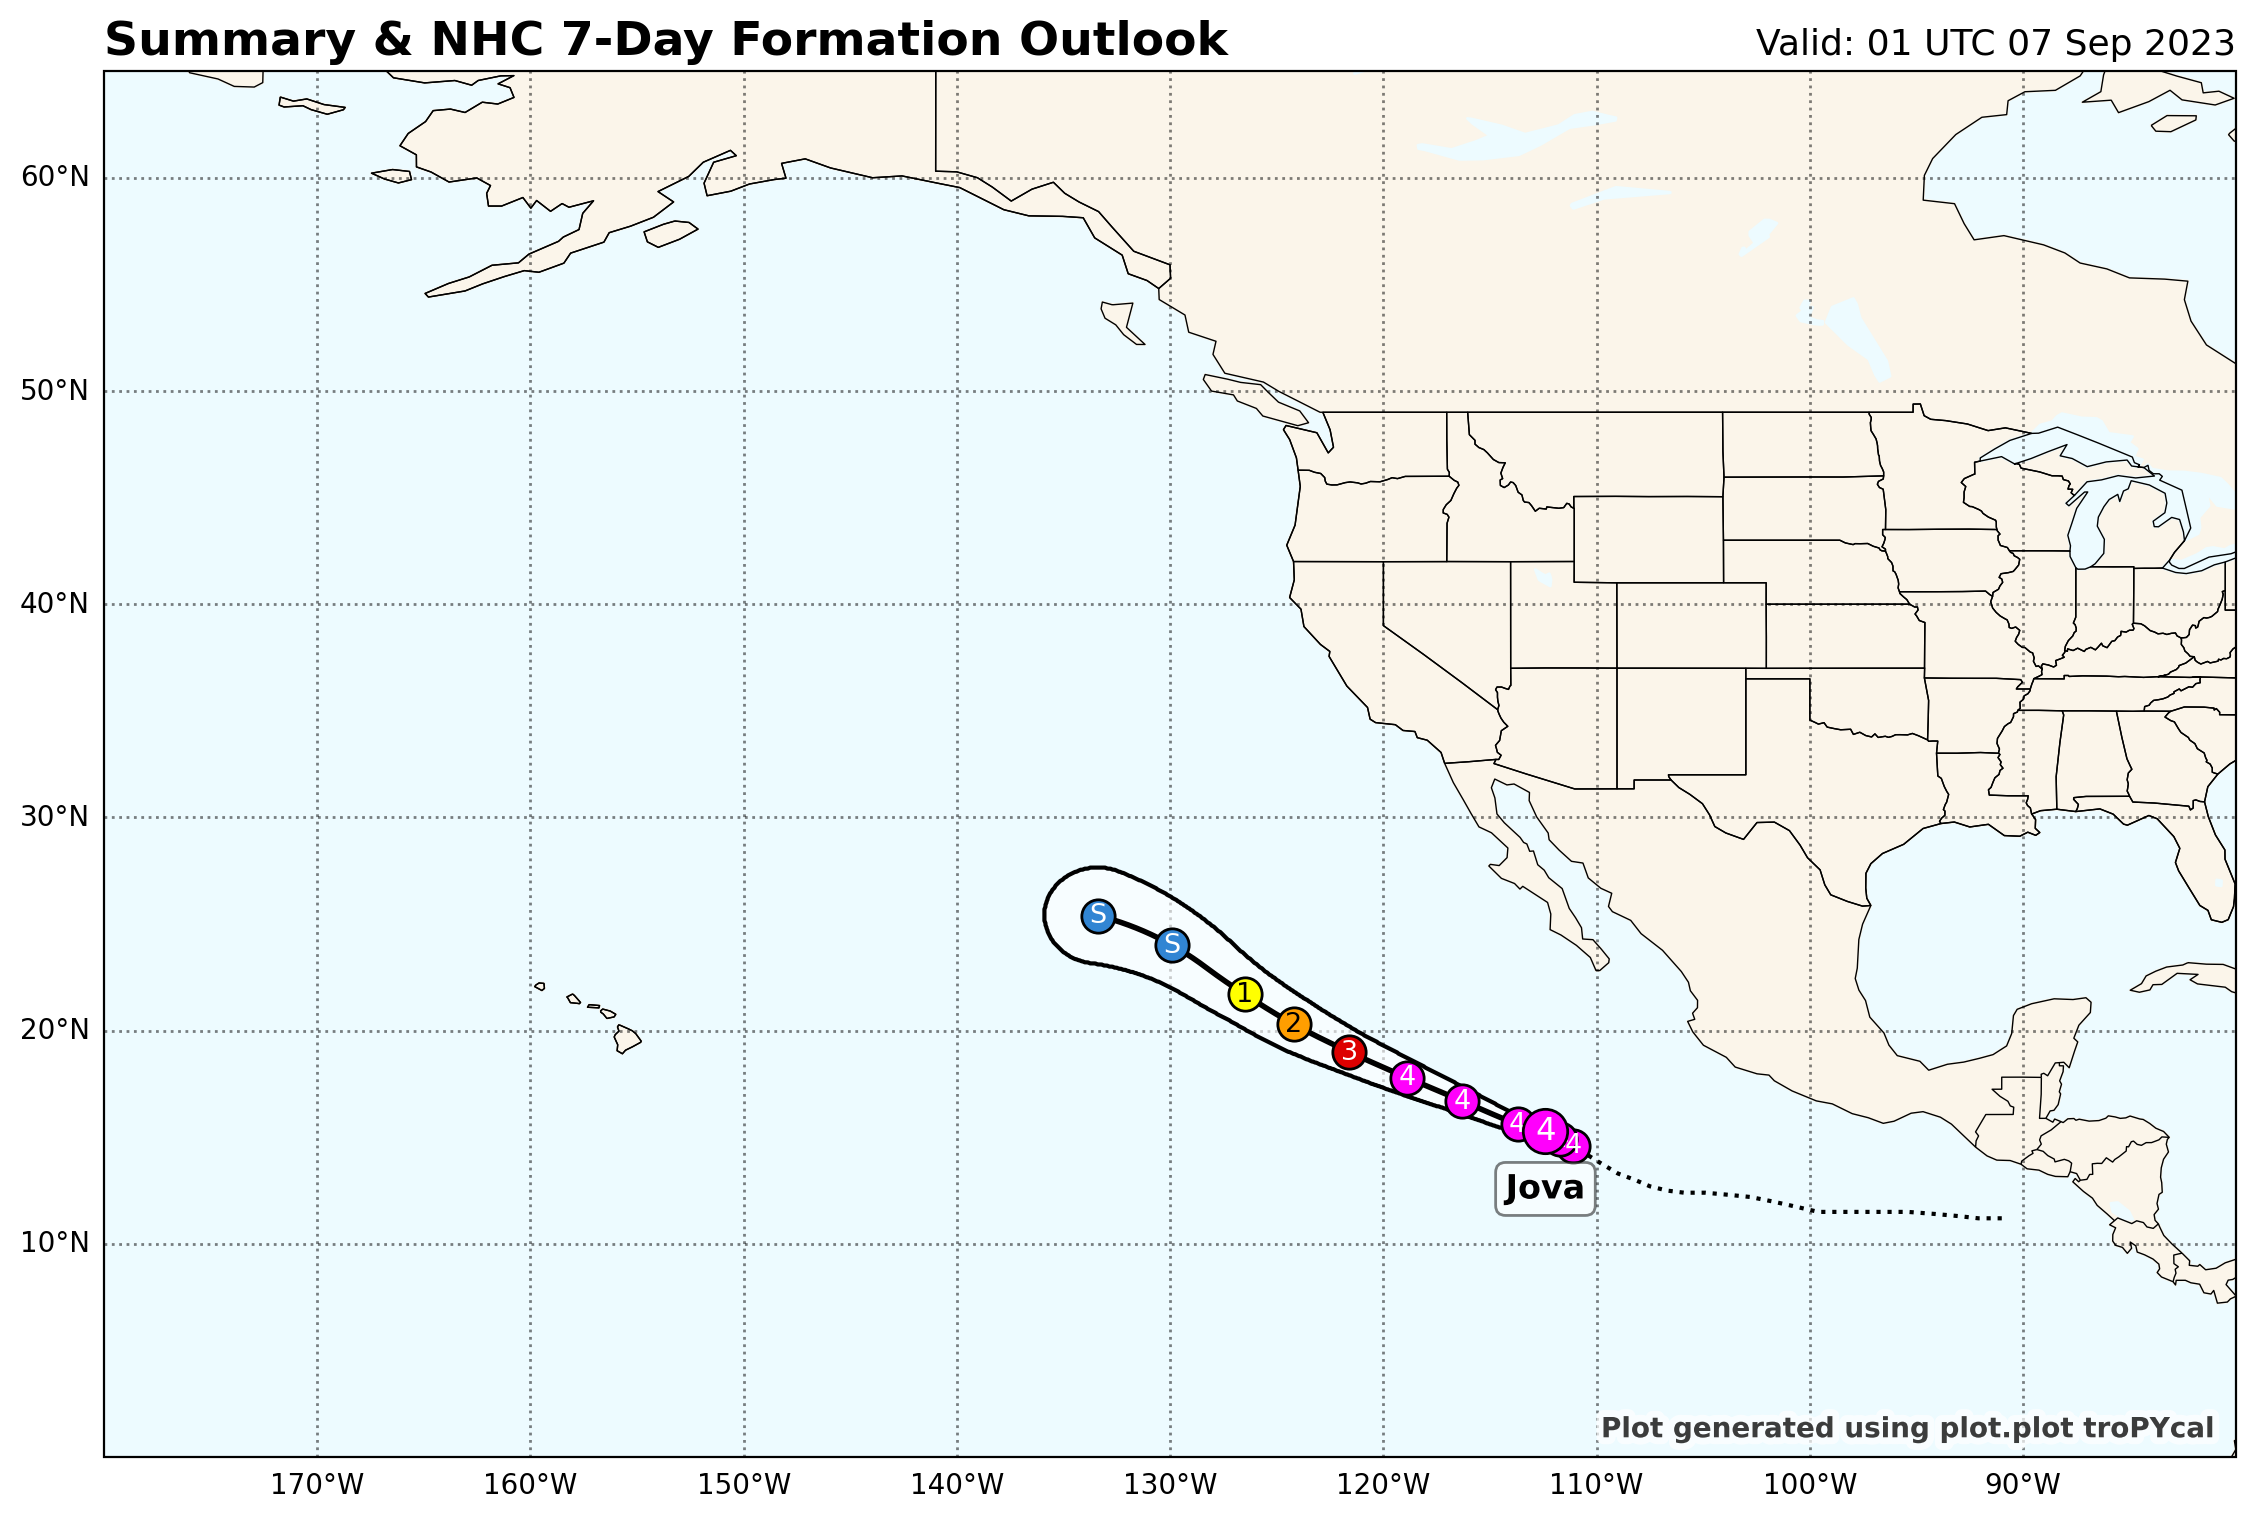

In [4]:
realtime_obj.plot_summary(domain='east_pacific')

Possible issue encountered when converting Shape #0 to GeoJSON: Shapefile format requires that polygons contain at least one exterior ring, but the Shape was entirely made up of interior holes (defined by counter-clockwise orientation in the shapefile format). The rings were still included but were encoded as GeoJSON exterior rings instead of holes.
Possible issue encountered when converting Shape #0 to GeoJSON: Shapefile format requires that polygons contain at least one exterior ring, but the Shape was entirely made up of interior holes (defined by counter-clockwise orientation in the shapefile format). The rings were still included but were encoded as GeoJSON exterior rings instead of holes.


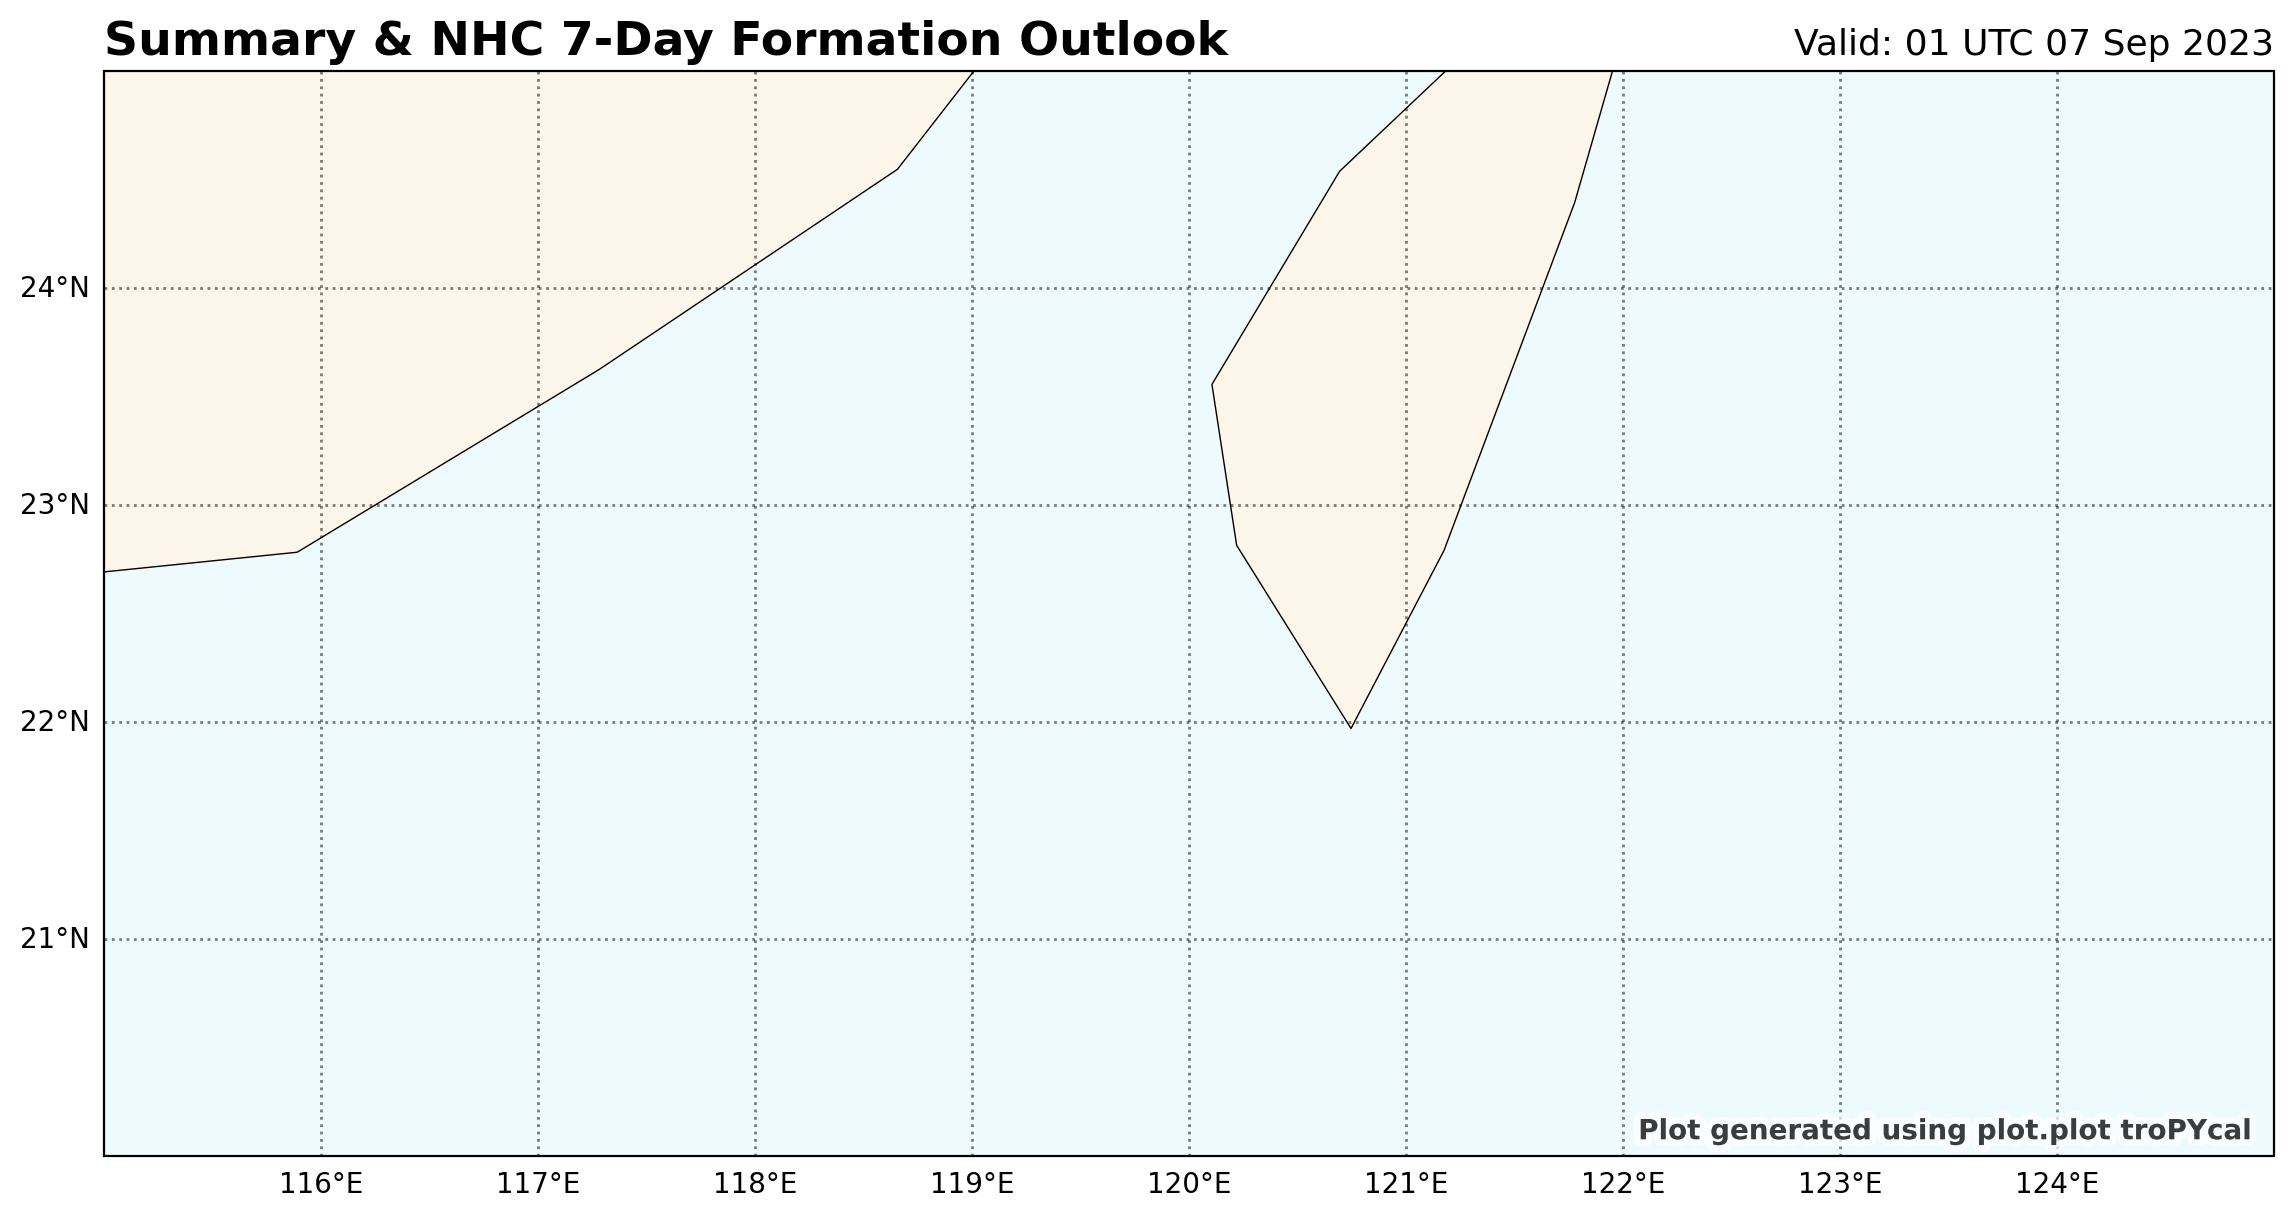

In [5]:
tw_domain = {'w':115,'e':125,'s':20,'n':25}
p = realtime_obj.plot_summary(domain=tw_domain)

In [6]:
storm = realtime_obj.get_storm(active_storms[2])

In [7]:
storm

<tropycal.realtime.RealtimeStorm>
Storm Summary:
    Maximum Wind:      135 knots
    Minimum Pressure:  933 hPa
    Start Time:        1800 UTC 04 September 2023
    End Time:          0000 UTC 07 September 2023

Variables:
    time        (datetime) [2023-09-02 00:00:00 .... 2023-09-07 00:00:00]
    extra_obs   (int64) [0 .... 0]
    special     (str) [ .... ]
    type        (str) [DB .... HU]
    lat         (float64) [11.2 .... 15.3]
    lon         (float64) [-91.0 .... -112.4]
    vmax        (int64) [15 .... 135]
    mslp        (int64) [1010 .... 933]
    wmo_basin   (str) [east_pacific .... east_pacific]

More Information:
    id:              EP112023
    operational_id:  EP112023
    name:            JOVA
    year:            2023
    season:          2023
    basin:           east_pacific
    source_info:     NHC Hurricane Database
    invest:          False
    source_method:   NHC's Automated Tropical Cyclone Forecasting System (ATCF)
    source_url:      https://ftp.nhc

In [8]:
storm_forecast = storm.get_forecast_realtime(ssl_certificate=False)

In [9]:
lats = storm['lat'].tolist() + storm_forecast['lat']
lons = storm['lon'].tolist() + storm_forecast['lon']

storm_s = min(lats) - 5
storm_n = max(lats) + 5
storm_w = max(lons) + 5
storm_e = min(lons) - 5
storm_box = (storm_w, storm_e, storm_s, storm_n)
storm_box

(-86.0, -138.4, 6.199999999999999, 30.4)

In [10]:
storm['lat']

array([11.2, 11.2, 11.3, 11.4, 11.5, 11.5, 11.5, 11.5, 11.8, 12. , 12.2,
       12.3, 12.4, 12.4, 12.5, 12.7, 13. , 13.3, 13.9, 14.6, 15.3])

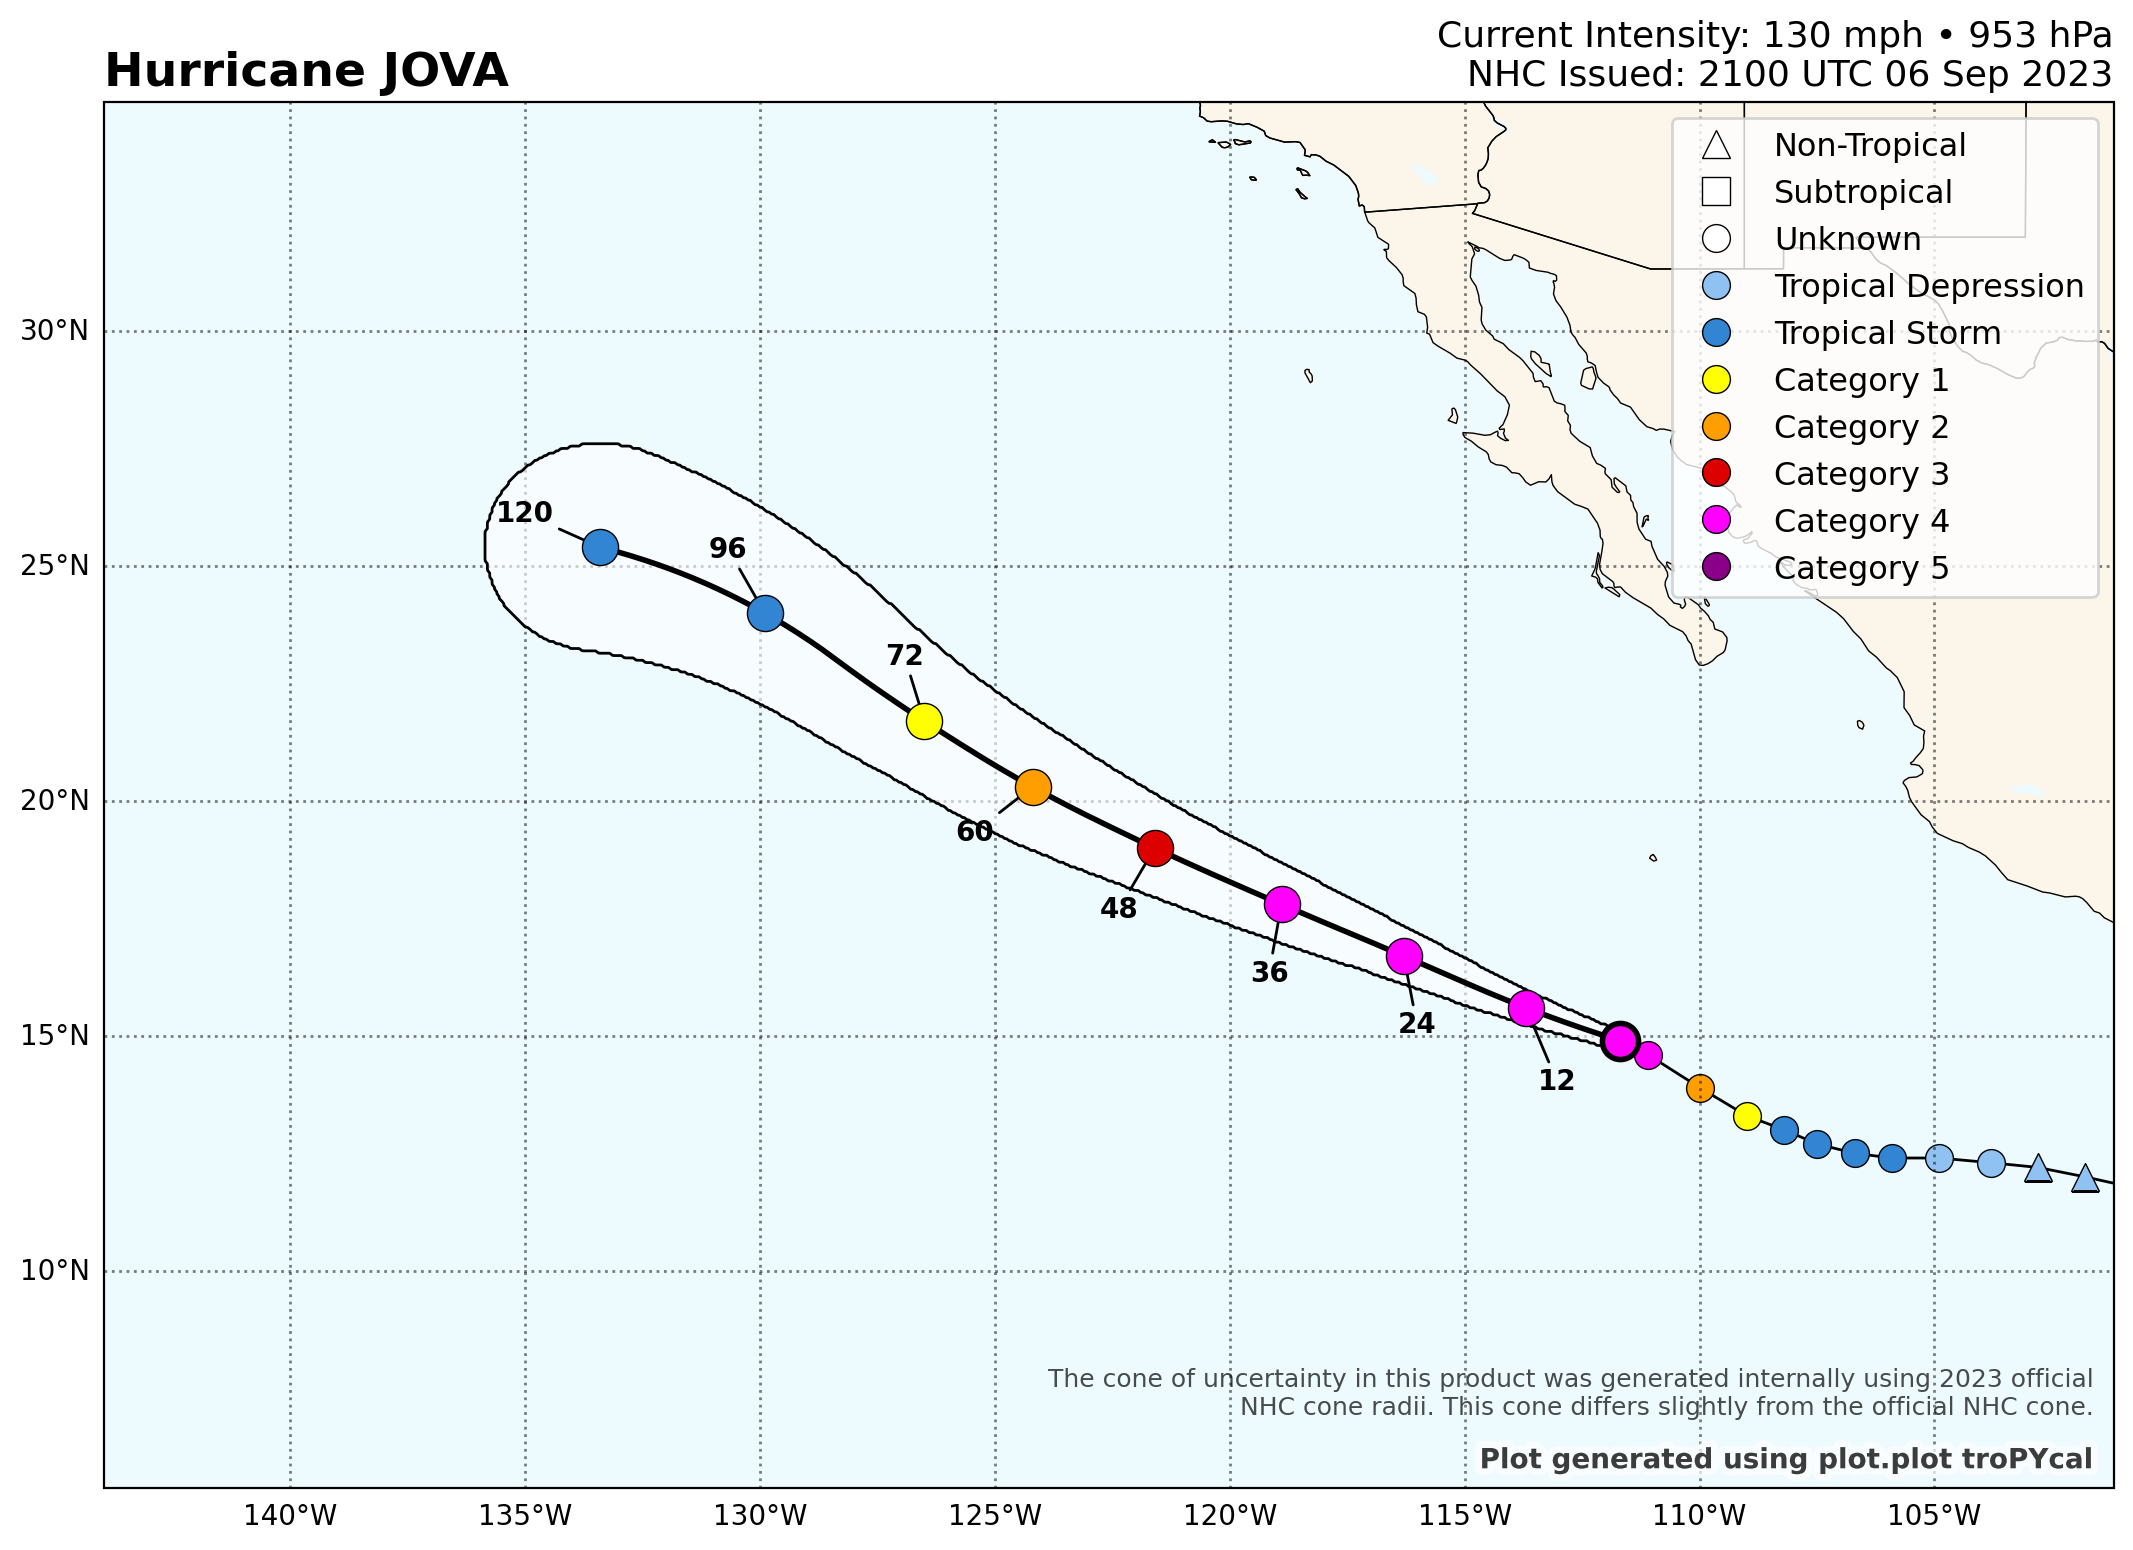

In [89]:
a = storm.plot_forecast_realtime(ssl_certificate=False, prop={'ms':10})

In [113]:
import datetime as dt
from tropycal import tracks, utils
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import matplotlib.lines as mlines

import datetime

from cartopy.mpl.ticker import (LongitudeFormatter, LatitudeFormatter,
                                LatitudeLocator)


def get_colors_sshws(wind_speed):
    r"""
    Retrieve the default colors for the Saffir-Simpson Hurricane Wind Scale (SSHWS).

    Parameters
    ----------
    wind_speed : int or list
        Sustained wind speed in knots.

    Returns
    -------
    str
        Hex string for the corresponding color.
    """

    # If category string passed, convert to wind
    if isinstance(wind_speed, str):
        wind_speed = category_label_to_wind(wind_speed)

    # Return default SSHWS category color scale
    if wind_speed < 5:
        return '#FFFFFF'
    elif wind_speed < 34:
        return '#8FC2F2'  # '#7DB7ED'
    elif wind_speed < 64:
        return '#3185D3'
    elif wind_speed < 83:
        return '#FFFF00'
    elif wind_speed < 96:
        return '#FF9E00'
    elif wind_speed < 113:
        return '#DD0000'
    elif wind_speed < 137:
        return '#FF00FC'
    else:
        return '#8B0088'

legend_size=7

ex = mlines.Line2D([], [], linestyle='None', ms=legend_size,                               mec='k', mew=0.5, label='Non-Tropical', marker='^', color='w')
sb = mlines.Line2D([], [], linestyle='None', ms=legend_size,
                               mec='k', mew=0.5, label='Subtropical', marker='s', color='w')
uk = mlines.Line2D([], [], linestyle='None', ms=legend_size,
                               mec='k', mew=0.5, label='Unknown', marker='o', color='w')
td = mlines.Line2D([], [], linestyle='None', ms=legend_size, mec='k', mew=0.5,
                               label='Tropical Depression', marker='o', color=get_colors_sshws(33))
ts = mlines.Line2D([], [], linestyle='None', ms=legend_size, mec='k',
                               mew=0.5, label='Tropical Storm', marker='o', color=get_colors_sshws(34))
c1 = mlines.Line2D([], [], linestyle='None', ms=legend_size, mec='k',
                               mew=0.5, label='Category 1', marker='o', color=get_colors_sshws(64))
c2 = mlines.Line2D([], [], linestyle='None', ms=legend_size, mec='k',
                               mew=0.5, label='Category 2', marker='o', color=get_colors_sshws(83))
c3 = mlines.Line2D([], [], linestyle='None', ms=legend_size, mec='k',
                               mew=0.5, label='Category 3', marker='o', color=get_colors_sshws(96))
c4 = mlines.Line2D([], [], linestyle='None', ms=legend_size, mec='k',
                               mew=0.5, label='Category 4', marker='o', color=get_colors_sshws(113))
c5 = mlines.Line2D([], [], linestyle='None', ms=legend_size, mec='k',
                               mew=0.5, label='Category 5', marker='o', color=get_colors_sshws(137))



In [ ]:
water_color= '#d5f0ff'
land_color = '#fcf3e8'
land_scale = '50m'


# Put a background image on for nice sea rendering.
# ax.stock_img()
from matplotlib.offsetbox import AnchoredText
# Create a feature for States/Admin 1 regions at 1:50m from Natural Earth
def main():
    fig = plt.figure()
    ax1 = fig.add_subplot(2, 2, 1,projection=ccrs.Orthographic(central_latitude=-8, central_longitude=125))
    ax1.set_extent([80, 170, -45, 30], crs=ccrs.PlateCarree())
    #ax = plt.axes(projection=ccrs.Orthographic())
    ax2 = fig.add_subplot(2, 2, 2,projection=ccrs.PlateCarree())
    ax2.set_extent([80, 170, -45, 30], crs=ccrs.PlateCarree())


    # Put a background image on for nice sea rendering.
    ax1.stock_img()
    ax2.stock_img()


    # Create a feature for States/Admin 1 regions at 1:50m from Natural Earth
    states_provinces = cfeature.NaturalEarthFeature(
        category='cultural',
        name='admin_1_states_provinces_lines',
        scale='50m',
        facecolor='none')

    SOURCE = 'Natural Earth'
    LICENSE = 'public domain'

    ax1.add_feature(cfeature.LAND)
    ax1.add_feature(cfeature.COASTLINE)
    ax1.add_feature(states_provinces, edgecolor='gray')

    # Add a text annotation for the license information to the
    # the bottom right corner.
    text = AnchoredText('\u00A9 {}; license: {}'
                        ''.format(SOURCE, LICENSE),
                        loc=4, prop={'size': 12}, frameon=True)
    #ax1.add_artist(text)

    plt.show()

main()

In [112]:
storm_forecast['already_forcasted'] = [(datetime.timedelta(hours=x) + storm_forecast['init']) <= storm.time.max()  for x in storm_forecast['fhr']]
storm_forecast

{'init': datetime.datetime(2023, 9, 6, 18, 0),
 'fhr': [0, 3, 12, 24, 36, 48, 60, 72, 96, 120],
 'lat': [14.6, 14.9, 15.6, 16.7, 17.8, 19.0, 20.3, 21.7, 24.0, 25.4],
 'lon': [-111.1,
  -111.7,
  -113.7,
  -116.3,
  -118.9,
  -121.6,
  -124.2,
  -126.5,
  -129.9,
  -133.4],
 'vmax': [115, 115, 135, 130, 120, 110, 95, 80, 55, 40],
 'mslp': [nan, 953, nan, nan, nan, nan, nan, nan, nan, nan],
 'type': ['HU', 'HU', 'HU', 'HU', 'HU', 'HU', 'HU', 'HU', 'TS', 'TS'],
 'windrad': [{34: [110, 100, 50, 60],
   50: [50, 40, 20, 20],
   64: [20, 20, 0, 10]},
  {34: [110, 100, 50, 60], 50: [50, 40, 20, 20], 64: [20, 20, 0, 10]},
  {34: [140, 130, 80, 90], 50: [50, 50, 30, 30], 64: [30, 25, 10, 20]},
  {34: [160, 180, 100, 120], 50: [70, 70, 40, 50], 64: [40, 30, 20, 30]},
  {34: [160, 180, 100, 120], 50: [70, 60, 50, 60], 64: [40, 40, 20, 30]},
  {34: [140, 140, 100, 120], 50: [60, 60, 50, 60], 64: [40, 40, 20, 30]},
  {34: [130, 110, 100, 110], 50: [60, 50, 30, 50]},
  {34: [120, 100, 70, 110], 50: 

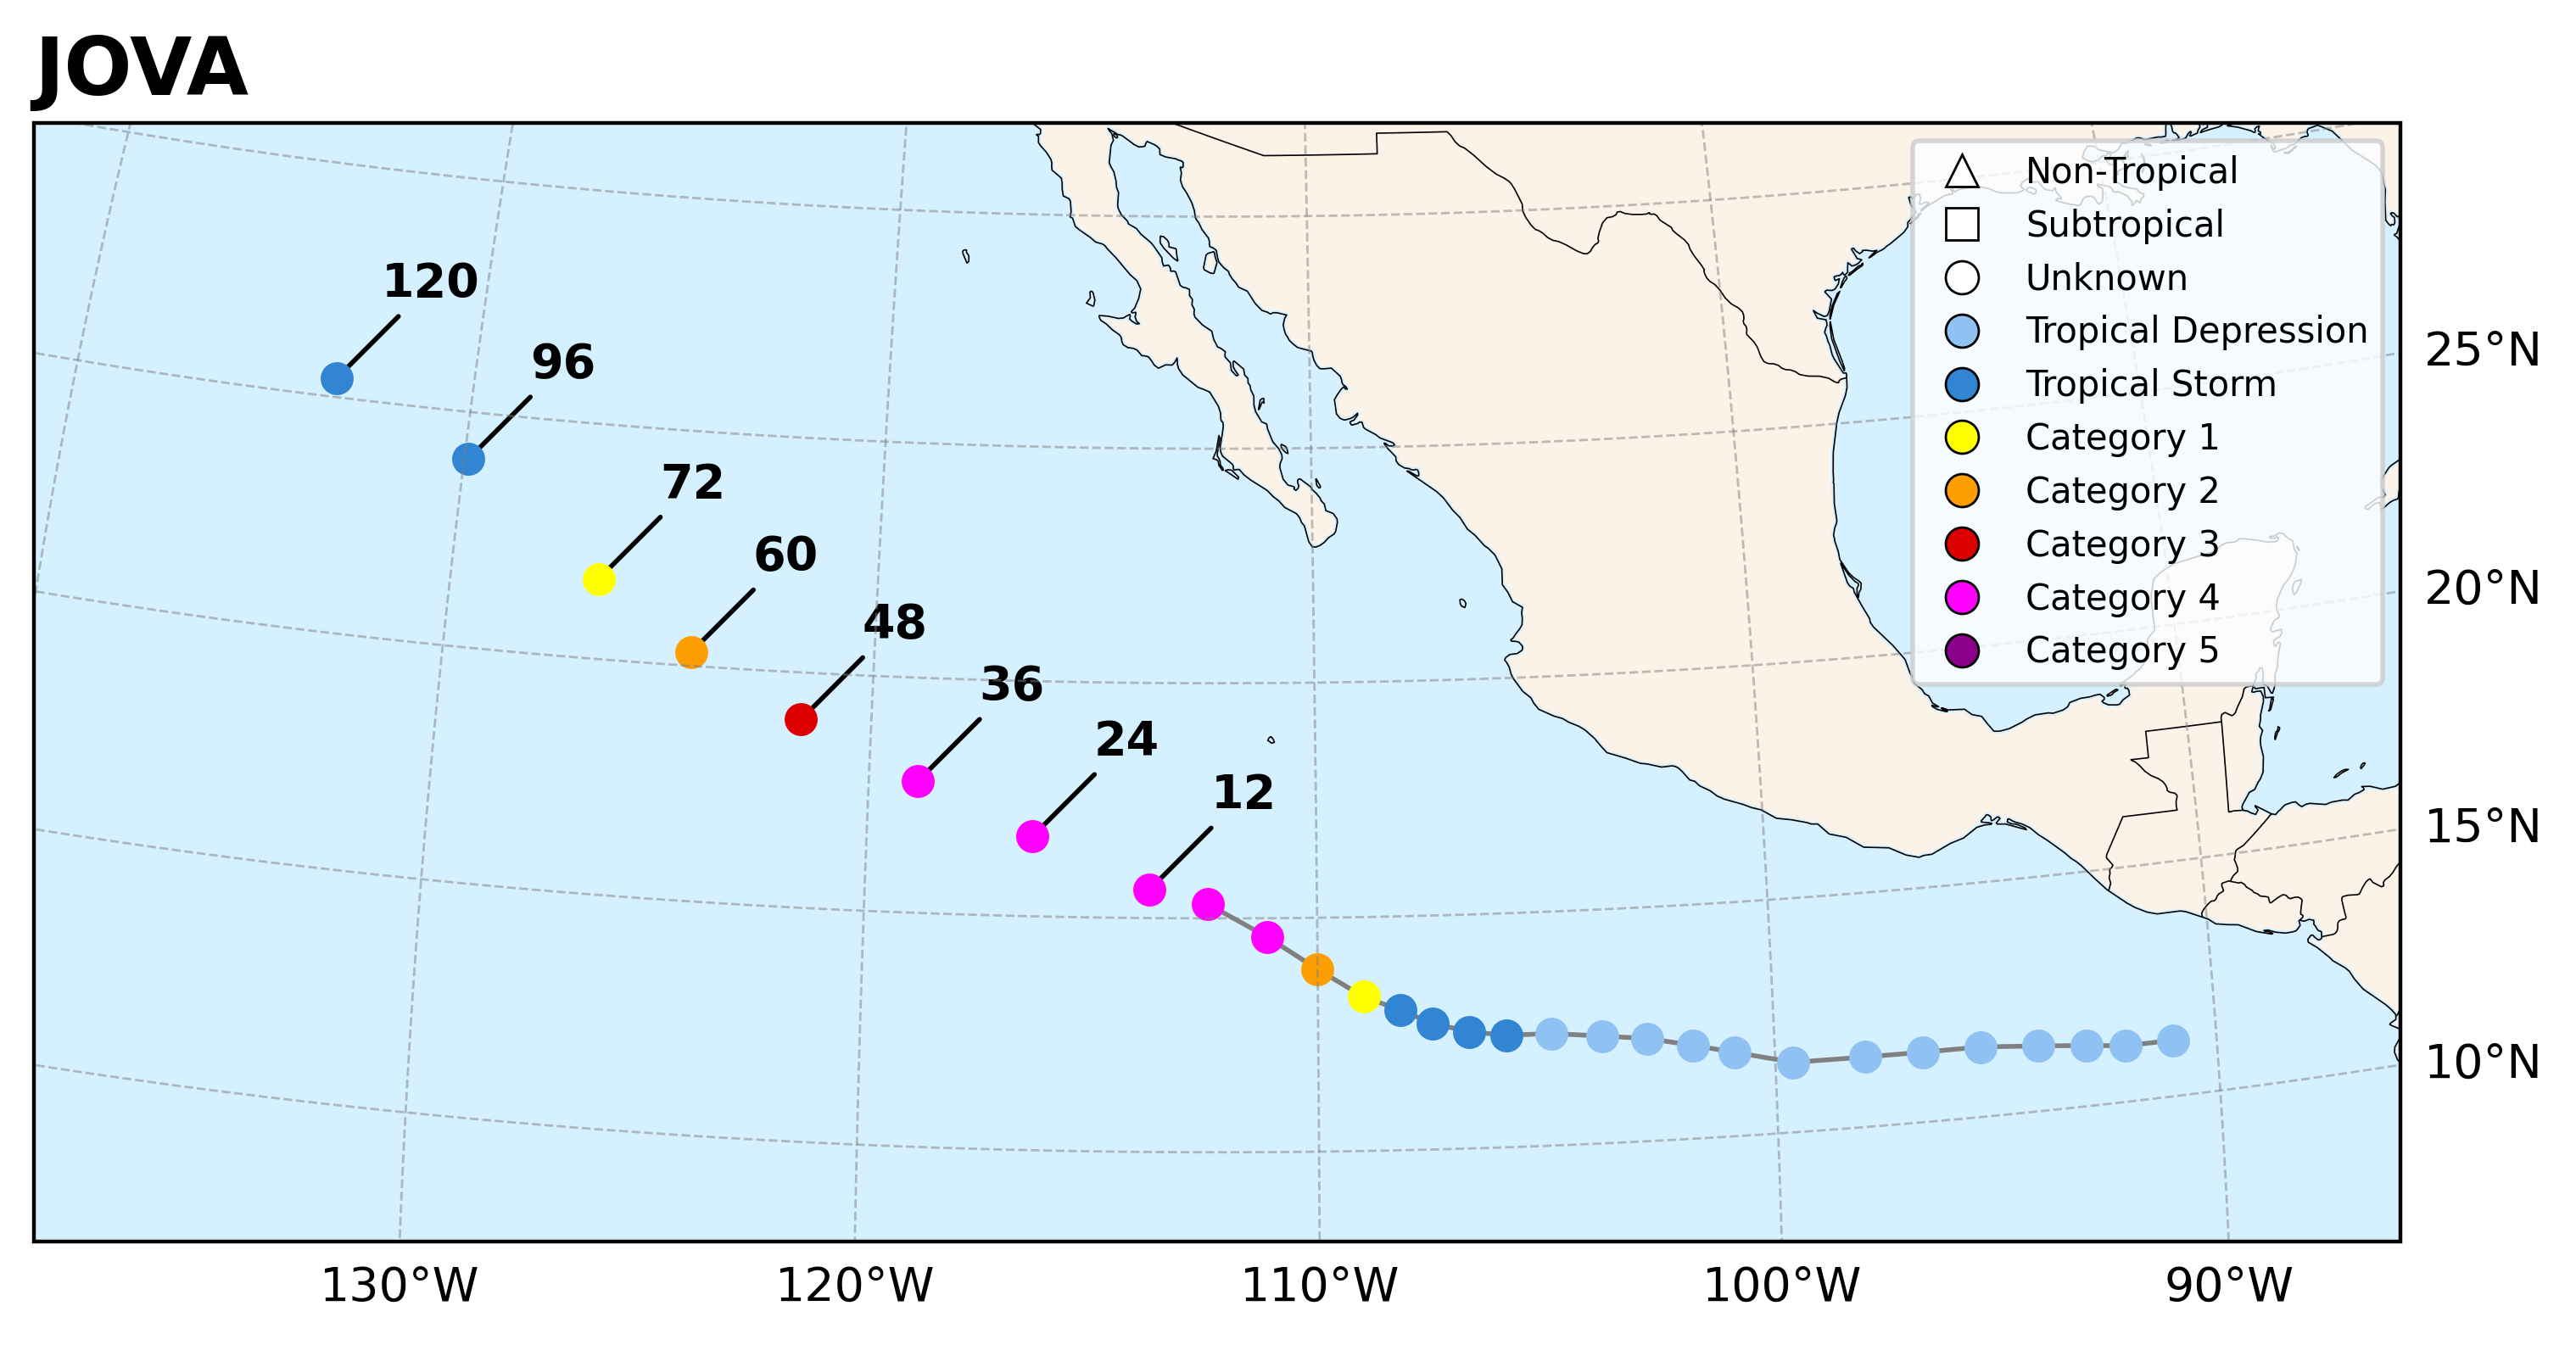

In [179]:
# Create an instance of figure and axes
fig = plt.figure(figsize=(9,6),dpi=400)
central_lon = (storm_box[0] + storm_box[1])/2
central_lat = (storm_box[2] + storm_box[3])/2

ax = plt.axes(projection=ccrs.Orthographic(central_longitude=central_lon, central_latitude=central_lat))
land_scale = '50m'

plt.title(storm['name'], loc='left', fontsize=17, fontweight='bold')
#ax.set_title(label=storm['name'], loc='left', fontsize=17, fontweight='bold')

# Plot coastlines and political boundaries
#ax.add_feature(cfeature.STATES.with_scale('50m'), linewidths=0.5, linestyle='solid', edgecolor='k')
ax.add_feature(cfeature.BORDERS.with_scale('50m'), linewidths=0.3, linestyle='solid', edgecolor='k')
ax.add_feature(cfeature.COASTLINE.with_scale('50m'), linewidths=0.3, linestyle='solid', edgecolor='k')

# Fill in continents in light gray
ax.add_feature(cfeature.LAND.with_scale('50m'), facecolor=land_color, edgecolor='face')
ax.add_feature(cfeature.OCEAN.with_scale('50m'), facecolor=water_color, edgecolor='face')



# Plot Line
ax.plot(storm['lon'], storm['lat'], transform=ccrs.PlateCarree(), linewidth=1, color = 'gray')
       

# Plot Dots
for i in range(0, len(storm['lat'])):
    ax.plot(storm['lon'][i], storm['lat'][i], transform=ccrs.PlateCarree(), linewidth=2, marker='o', color = get_colors_sshws(np.nan_to_num(storm['vmax'][i]))
       )

for i in range(0, len(storm_forecast['lat'])):
    if storm_forecast['already_forcasted'][i]:
        continue

    ax.annotate(text=str(storm_forecast['fhr'][i]),  
                             xy=(storm_forecast['lon'][i], storm_forecast['lat'][i]), 
                xycoords="data",
                             xytext=(20,20),
                textcoords="offset points",
                fontweight='bold', ha='center', va='center',
                             arrowprops=dict(arrowstyle="-",  # ->
                                             shrinkA=0, shrinkB=0,
                                             connectionstyle="arc3",
                                             color='k'),
                             transform=ccrs.PlateCarree(), clip_on=True, zorder=1)
    ax.plot(storm_forecast['lon'][i], storm_forecast['lat'][i], transform=ccrs.PlateCarree(), marker ='o',
            color = get_colors_sshws(np.nan_to_num(storm_forecast['vmax'][i])),
           zorder=2)

ax.legend(handles=[ex, sb, uk, td, ts,
                           c1, c2, c3, c4, c5], prop={'size': 7.5})


label_style = {"size":10, "color":"black"}
               
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=0.5, color='gray', alpha=0.5, linestyle='--')
gl.top_labels = False
gl.left_labels = False
#gl.xlines = False
#gl.xlocator = mticker.FixedLocator([-180, -45, 0, 45, 180])
gl.ylocator = LatitudeLocator()
gl.xformatter = LongitudeFormatter()
gl.yformatter = LatitudeFormatter()
gl.ylabel_style = label_style
gl.xlabel_style = label_style


# ax.add_feature( cfeature.NaturalEarthFeature(category='cultural', name='admin_0_countries', scale=land_scale,
#                                         edgecolor='face',
#                                          facecolor=cfeature.COLORS['land'])
#                                             )


# Zoom in over the Gulf Coast
ax.set_extent(storm_box, crs=ccrs.PlateCarree())

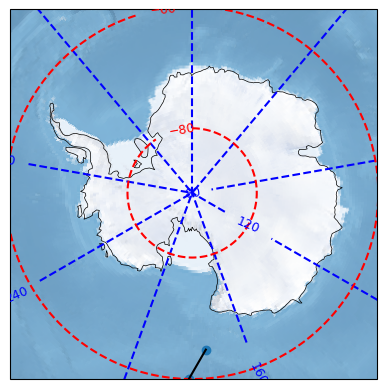

In [15]:
import numpy as np
def workaround_gridlines(src_proj, labels=True):
    # Workaround for plotting lines of constant latitude/longitude as gridlines
    # labels not supported for this projection.
    lats = np.linspace(-90, 90, num=181, endpoint=True)
    lons = np.linspace(0, 360, num=360, endpoint=False)

    yn = np.zeros(len(lats))
    lona = lons + yn.reshape(len(lats),1)
    cs2 = plt.contour(lons, lats, lona, 10, transform=src_proj, colors='b', linestyles='dashed')
    plt.clabel(cs2, fontsize=9, inline=True)

    yt = np.zeros(len(lons))
    lata = lats.reshape(len(lats),1) + yt
    cs = plt.contour(lons, lats, lata, 10, transform=src_proj, colors='r', linestyles='dashed')
    plt.clabel(cs, fontsize=9, inline=True)


def main():
    trgt_proj = ccrs.Orthographic(central_latitude=-90)
    src_proj = ccrs.PlateCarree()
    src_crs = ccrs.Geodetic()

    ax = plt.axes(projection=trgt_proj)
    ax.stock_img()

    ln = np.array([-179, 175])
    lt = np.array([-60, -65])

    # Plot gridlines
    workaround_gridlines(src_proj)

    ax.set_extent((ln.min(), ln.max(), lt.min(), lt.max()), crs=src_proj)
    ax.coastlines(resolution='110m', color='black', linewidth=0.5, zorder=1)

    plt.plot(ln, lt, '-k', transform=src_crs)
    plt.scatter(x=ln, y=lt, transform=src_crs)

    plt.show()
main()